# 0. Install and Import Dependencies

In [1]:
# It lists all installed Python packages and their versions
%pip list

Package                      Version
---------------------------- ---------
absl-py                      2.1.0
altair                       5.3.0
asttokens                    2.0.8
astunparse                   1.6.3
attrs                        23.2.0
autopep8                     1.7.0
backcall                     0.2.0
beautifulsoup4               4.12.3
blinker                      1.8.2
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.6.3
decorator                    5.1.1
entrypoints                  0.4
executing                    1.1.1
filelock                     3.14.0
flatbuffers                  24.3.25
fonttools                    4.51.0
gast                         0.5.4
gdown                        5.2.0
gitdb                        4.0.11
GitPy

In [2]:
# The %pip install command is used to install Python packages
# The following packages will be installed:
# - opencv-python: A library for computer vision tasks
# - matplotlib: A library for creating static, animated, and interactive visualizations in Python
# - imageio: A library for reading and writing images in various formats
# - gdown: A utility for downloading files from Google Drive
# - tensorflow: An open-source platform for machine learning and artificial intelligence

%pip install opencv-python matplotlib imageio gdown tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import the os module for interacting with the operating system, such as file and directory operations
import os

# Import the cv2 module from OpenCV for computer vision tasks, such as image and video processing
import cv2

# Import TensorFlow, a library for machine learning and artificial intelligence
import tensorflow as tf

# Import NumPy, a library for numerical computing in Python, particularly for working with arrays
import numpy as np

# Import List from the typing module for type hinting, which helps in specifying that a variable should be a list
from typing import List

# Import pyplot from matplotlib for creating static, animated, and interactive visualizations in Python
from matplotlib import pyplot as plt

# Import the imageio module for reading and writing images in various formats
import imageio


In [4]:
# List all available physical devices of a specified type (in this case, 'GPU')
# This function is useful for checking if TensorFlow can access any GPUs on the system
# GPUs can significantly speed up the training and inference processes for deep learning models
tf.config.list_physical_devices('GPU')

[]

In [5]:
# List all available physical devices of type 'GPU'
physical_devices = tf.config.list_physical_devices('GPU')

try:
    # Enable memory growth for the first GPU device
    # Memory growth allows TensorFlow to allocate memory on the GPU as needed,
    # rather than pre-allocating all available memory upfront.
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    # Pass if there is an exception, which can occur if no GPUs are available
    # or if there is an issue setting memory growth.
    pass

# 1. Build Data Loading Functions

In [6]:
# Import the gdown module, which is a utility for downloading files from Google Drive
import gdown

In [8]:
# Define the URL of the file to be downloaded from Google Drive
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'

# Define the output file name for the downloaded file
output = 'data.zip'

# Download the file from the given URL and save it as 'data.zip'
# The 'quiet=False' parameter ensures that the download progress is displayed
gdown.download(url, output, quiet=False)

# Extract the contents of the 'data.zip' file to the current directory
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=71d944af-c26b-4dcc-98bb-d0d2af86bfea
To: c:\Users\Sidharth Bhawani\OneDrive\Desktop\LipLang AI-Major Project (Final Year)\data.zip
100%|██████████| 423M/423M [00:32<00:00, 12.8MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [9]:
def load_video(path:str) -> List[float]: 
    """
    Load a video from the specified path, process its frames, and return a list of normalized frames.

    Args:
    - path (str): The path to the video file.

    Returns:
    - List[float]: A list of normalized frames.
    """

    # Open the video file for reading
    cap = cv2.VideoCapture(path)
    
    # Initialize an empty list to store the frames
    frames = []

    # Iterate over each frame in the video
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        # Read the next frame
        ret, frame = cap.read()
        
        # Convert the frame from RGB to grayscale
        frame = tf.image.rgb_to_grayscale(frame)
        
        # Crop the frame to the region of interest
        frames.append(frame[190:236, 80:220, :])

    # Release the video file
    cap.release()
    
    # Calculate the mean value of the frames
    mean = tf.math.reduce_mean(frames)
    
    # Calculate the standard deviation of the frames
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    
    # Normalize the frames by subtracting the mean and dividing by the standard deviation
    return tf.cast((frames - mean), tf.float32) / std

In [10]:
# Create a list called 'vocab' containing individual characters.
# The characters include lowercase letters, apostrophe, question mark, exclamation mark, digits from 0 to 9, and a space.
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [11]:
# Create a StringLookup layer to map characters to integers.
# 'vocabulary=vocab' specifies the vocabulary to use for mapping.
# 'oov_token=""' specifies the token to use for out-of-vocabulary characters (not in the vocab list).
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")

# Create a StringLookup layer to map integers back to characters (inverse mapping).
# 'vocabulary=char_to_num.get_vocabulary()' uses the vocabulary from the char_to_num layer for mapping.
# 'invert=True' specifies that the mapping should be inverted (from integers to characters).
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

# Print the vocabulary used in the char_to_num layer.
# This includes all the characters in the vocab list, as well as the OOV token if specified.
print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [12]:
# Get the vocabulary used by the char_to_num StringLookup layer.
# This vocabulary includes all the characters for which the layer has mappings,
# including the out-of-vocabulary (OOV) token if one was specified during initialization.
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [13]:
# Use the char_to_num StringLookup layer to map a list of characters ['n', 'i', 'c', 'k'] to integers.
# The layer maps each character to its corresponding integer based on the vocabulary it was initialized with.
char_to_num(['n', 'i', 'c', 'k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11], dtype=int64)>

In [14]:
# Use the num_to_char StringLookup layer to map a list of integers [14, 9, 3, 11] to characters.
# The layer maps each integer to its corresponding character based on the vocabulary it was initialized with.
num_to_char([14, 9, 3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [15]:
def load_alignments(path:str) -> List[str]: 
    """
    Load alignments from a file and convert them to a list of tokens.

    Args:
    - path (str): The path to the file containing alignments.

    Returns:
    - List[str]: A list of tokens.
    """
    
    # Open the file at the specified path for reading
    with open(path, 'r') as f: 
        # Read all lines from the file
        lines = f.readlines() 
    
    # Initialize an empty list to store tokens
    tokens = []
    
    # Iterate over each line in the lines read from the file
    for line in lines:
        # Split the line into tokens based on whitespace
        line = line.split()
        
        # Check if the third token is not 'sil'
        if line[2] != 'sil': 
            # Append a space and the third token to the tokens list
            tokens = [*tokens,' ',line[2]]
    
    # Convert the list of tokens to a tensor of characters and then to a list, excluding the first element
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [16]:
def load_data(path: str): 
    """
    Load data from a specified path.

    Args:
    - path (str): The path to the data file.

    Returns:
    - Tuple[List[float], List[str]]: A tuple containing frames (List[float]) and alignments (List[str]).
    """
    
    # Convert the path from a byte string to a regular string
    path = bytes.decode(path.numpy())
    
    # Extract the file name from the path
    file_name = path.split('\\')[-1].split('.')[0]
    
    # Construct the paths to the video and alignment files
    video_path = os.path.join('data', 's1', f'{file_name}.mpg')
    alignment_path = os.path.join('data', 'alignments', 's1', f'{file_name}.align')
    
    # Load frames from the video file
    frames = load_video(video_path)
    
    # Load alignments from the alignment file
    alignments = load_alignments(alignment_path)
    
    # Return the frames and alignments as a tuple
    return frames, alignments

In [17]:
# Define a variable 'test_path' that contains the path to a video file.
# The path is relative to the current directory and specifies a video file named 'bbal6n.mpg'
# located in the 'data/s1' directory.
test_path = '.\\data\\s1\\bbal6n.mpg'

In [18]:
# Converts the test_path string into a TensorFlow tensor, then into a NumPy array, decodes it from bytes to a UTF-8 string, and finally extracts the file name without the extension.
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [19]:
# Convert the 'test_path' string to a TensorFlow tensor and pass it to the load_data function.
# The load_data function loads frames and alignments from the specified path.
frames, alignments = load_data(tf.convert_to_tensor(test_path))

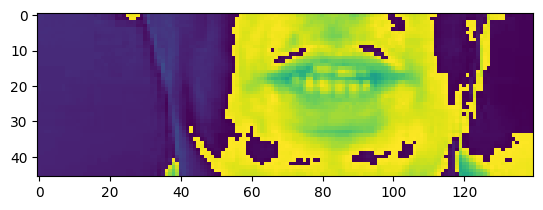

In [20]:
# Display the frame at index 40 from the 'frames' list using Matplotlib's 'imshow' function.
plt.imshow(frames[40])

In [21]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23], dtype=int64)>

In [22]:
# Converts the integer tensor alignments into characters using the num_to_char StringLookup layer, then decodes the byte strings into regular strings
# and finally joins them into a single string using reduce_join from TensorFlow's tf.strings module.
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [23]:
def mappable_function(path:str) ->List[str]:
    """
    A function that applies a PyFunction to load data from a specified path.

    Args:
    - path (str): The path to the data file.

    Returns:
    - List[str]: A list containing the loaded data.
    """
    
    # Apply the PyFunction 'load_data' to the specified 'path'.
    # The PyFunction returns a tuple containing frames (tf.float32) and alignments (tf.int64).
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    
    # Return the result
    return result

# 2. Create Data Pipeline

In [24]:
# Import the pyplot module from the Matplotlib library and alias it as plt
from matplotlib import pyplot as plt

In [25]:
# Create a dataset from a list of files matching the pattern './data/s1/*.mpg'
data = tf.data.Dataset.list_files('./data/s1/*.mpg')

# Shuffle the dataset with a buffer size of 500 and disable reshuffling each iteration
data = data.shuffle(500, reshuffle_each_iteration=False)

# Apply the mappable function to each element of the dataset
data = data.map(mappable_function)

# Pad each batch in the dataset to have a fixed shape
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))

# Prefetch elements from the dataset to improve performance
data = data.prefetch(tf.data.AUTOTUNE)

# Split the dataset into a training set (first 450 elements) and a test set (remaining elements)
train = data.take(450)
test = data.skip(450)

In [26]:
len(test)

50

In [27]:
# Get the next element (batch) from the dataset as NumPy arrays
frames, alignments = data.as_numpy_iterator().next()

In [28]:
len(frames)

2

In [29]:
# Create an iterator over the dataset that yields elements as NumPy arrays
sample = data.as_numpy_iterator()

In [30]:
val = sample.next(); val[0]

array([[[[[1.0169218 ],
          [1.0560342 ],
          [0.8604723 ],
          ...,
          [0.31289902],
          [0.27378663],
          [0.27378663]],

         [[1.0951465 ],
          [1.0951465 ],
          [0.66491044],
          ...,
          [0.31289902],
          [0.27378663],
          [0.27378663]],

         [[1.4080455 ],
          [1.4080455 ],
          [1.2907084 ],
          ...,
          [0.35201138],
          [0.31289902],
          [0.27378663]],

         ...,

         [[1.0560342 ],
          [1.0560342 ],
          [1.0560342 ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],

         [[1.0169218 ],
          [1.0169218 ],
          [0.9778094 ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],

         [[1.0169218 ],
          [1.0169218 ],
          [0.9778094 ],
          ...,
          [0.        ],
          [0.        ],
          [9.973656  ]]],


        [[[0.9386

In [ ]:
# Save the first frame of the first video in the batch as a GIF animation
imageio.mimsave('./animation.gif', val[0][0], fps=10)

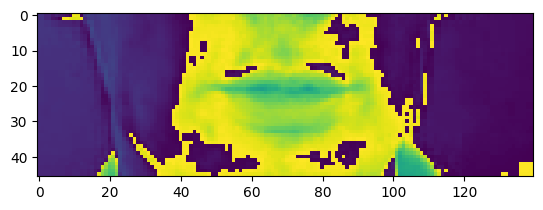

In [32]:
# Display the 35th frame of the first video in the batch using Matplotlib's 'imshow' function
plt.imshow(val[0][0][35])

In [33]:
# Convert each integer in the sequence to a character using the 'num_to_char' mapping,
# and join the characters into a single string using 'reduce_join' from TensorFlow's 'tf.strings' module.
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'set blue by u three again'>

# 3. Design the Deep Neural Network

In [34]:
# Import the 'Sequential' class for creating a sequential model
from tensorflow.keras.models import Sequential

# Import layers for building the model
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten

# Import the 'Adam' optimizer for compiling the model
from tensorflow.keras.optimizers import Adam

# Import callbacks for training the model
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [35]:
# Get an iterator for the dataset that yields elements as NumPy arrays,
# get the next element (batch) from the iterator, and access the first video in the batch,
# then access the first frame of that video and get its shape.
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [38]:
# Initialize a sequential model
model = Sequential()

# Add a 3D convolutional layer with 128 filters, a kernel size of 3, and 'same' padding
# Input shape is (75, 46, 140, 1) representing the dimensions of a video frame
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))  # Max pooling over the time dimension (1) and spatial dimensions (2, 2)

# Add another 3D convolutional layer with 256 filters and 'same' padding
model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

# Add another 3D convolutional layer with 75 filters and 'same' padding
model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

# Flatten the output of the convolutional layers for each time step
model.add(TimeDistributed(Flatten()))

# Add a bidirectional LSTM layer with 128 units and orthogonal kernel initializer
model.add(Bidirectional(LSTM(128, kernel_initializer='orthogonal', return_sequences=True)))
model.add(Dropout(.5))  # Apply dropout regularization

# Add another bidirectional LSTM layer with 128 units and orthogonal kernel initializer
model.add(Bidirectional(LSTM(128, kernel_initializer='orthogonal', return_sequences=True)))
model.add(Dropout(.5))  # Apply dropout regularization

# Add a dense layer with the vocabulary size + 1 units and softmax activation
# The vocabulary size is obtained from the 'char_to_num' mapping
model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [ ]:
5*17*75

In [40]:
yhat = model.predict(val[0])

1/1 [==============================] - 3s 3s/step


In [41]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'444iiiiiiiiiiiiiimmmmmmmmmmmmmmmmmmmmmmiiiiiiiiiiimmmmmmmmiiiiiiiiiiixxxxxx'>

In [42]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'444iiiiiiiiiiiiiimmmmmmmmmmmmmmmmmmmmmmiiiiiiiiiiimmmmmmmmiiiiiiiiiiixxxxxx'>

In [43]:
model.input_shape

(None, 75, 46, 140, 1)

In [44]:
model.output_shape

(None, 75, 41)

# 4. Setup Training Options and Train

In [45]:
def scheduler(epoch, lr):
    """
    Learning rate scheduler that reduces the learning rate exponentially after the first 30 epochs.

    Args:
    - epoch (int): Current epoch number.
    - lr (float): Current learning rate.

    Returns:
    - float: Updated learning rate.
    """
    # If the epoch is less than 30, keep the learning rate unchanged
    if epoch < 30:
        return lr
    # If the epoch is 30 or greater, reduce the learning rate exponentially
    else:
        return lr * tf.math.exp(-0.1)

In [46]:
def CTCLoss(y_true, y_pred):
    """
    Compute the Connectionist Temporal Classification (CTC) loss between y_true and y_pred.

    Args:
    - y_true (tensor): True labels, shape (batch_size, max_label_length).
    - y_pred (tensor): Predicted logits, shape (batch_size, max_input_length, num_classes).

    Returns:
    - tensor: CTC loss.
    """
    # Calculate the batch size
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    # Calculate the length of the predicted sequence
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    # Calculate the length of the true label sequence
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    # Reshape the input length to match the batch size
    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    # Reshape the label length to match the batch size
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    # Compute the CTC loss using the ctc_batch_cost function
    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [47]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        """
        Initialize the callback with the dataset iterator.

        Args:
        - dataset: Dataset iterator.
        """
        self.dataset = dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch, logs=None) -> None:
        """
        Called at the end of each epoch.

        Args:
        - epoch (int): Epoch number.
        - logs (dict): Dictionary containing metrics for the current epoch (unused).
        """
        # Get the next batch of data
        data = self.dataset.next()
        # Predict the output for the batch
        yhat = self.model.predict(data[0])
        # Decode the predictions using CTC decoding
        decoded = tf.keras.backend.ctc_decode(yhat, [75, 75], greedy=False)[0][0].numpy()

        # Print original and predicted sequences for each sample in the batch
        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~' * 100)

In [48]:
# Compile the model with Adam optimizer using a learning rate of 0.0001 and custom CTC loss function
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [49]:
# Callback to save model weights based on the loss value
checkpoint_callback = ModelCheckpoint(os.path.join('models', 'checkpoint'), monitor='loss', save_weights_only=True)

In [50]:
# Callback to adjust the learning rate schedule during training
# LearningRateScheduler updates the learning rate based on the 'scheduler' function
schedule_callback = LearningRateScheduler(scheduler)

In [51]:
# Create a callback to generate example predictions using the 'test' dataset
example_callback = ProduceExample(test)

In [52]:
# Train the model using the 'train' dataset for training and 'test' dataset for validation
model.fit(train, validation_data=test, epochs=100, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/100
  2/450 [..............................] - ETA: 3:03 - loss: 213.9969 


KeyboardInterrupt



# 5. Make a Prediction 

In [ ]:
# This will download the zip file from the provided URL and extract its contents to the 'models' directory
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

In [53]:
# Load the saved weights of the model from the 'models/checkpoint' directory
model.load_weights('models/checkpoint')

In [54]:
# Create an iterator for the test dataset
test_data = test.as_numpy_iterator()

In [56]:
# Get the next batch of data from the test_data iterator
sample = test_data.next()

In [57]:
# Use the trained model to predict the output for the input data
yhat = model.predict(sample[0])

1/1 [==============================] - 1s 973ms/step


In [58]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'place white at x six please'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay blue in x four now'>]

In [59]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [60]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'place white at x six please'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay blue in x four now'>]

# Test on a Video

In [61]:
sample = load_data(tf.convert_to_tensor('.\\data\\s1\\bras9a.mpg'))

In [62]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [63]:
# The yhat variable will contain the model's predictions for the expanded input data. Expanding the dimensions of the input 
# data is often necessary when the model expects a batch dimension even for a single sample.
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 1s 720ms/step


In [64]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [65]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]